In [23]:
from diffusers import DiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image
import torch

In [24]:
raw_img = load_image("/home/ubuntu/refiner/img/ctrl_inpaint.png").convert("RGB")

In [25]:
refiner_model_id = "stabilityai/stable-diffusion-xl-refiner-1.0"

refiner = DiffusionPipeline.from_pretrained(
    refiner_model_id,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)

refiner.scheduler = DDIMScheduler.from_config(refiner.scheduler.config)
refiner.enable_model_cpu_offload()

Loading pipeline components...: 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


100%|██████████| 15/15 [00:04<00:00,  3.25it/s]


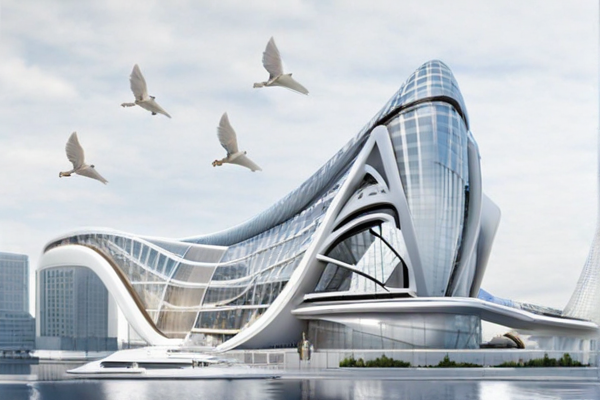

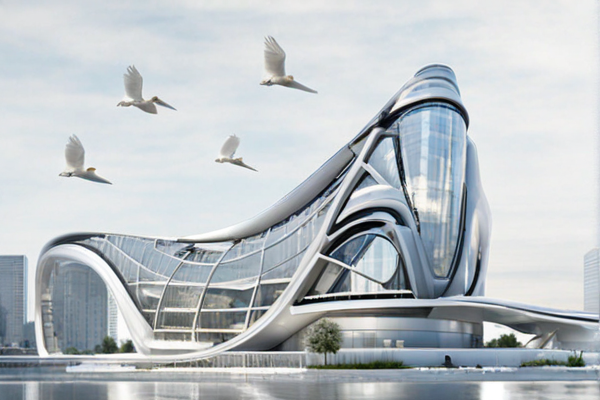

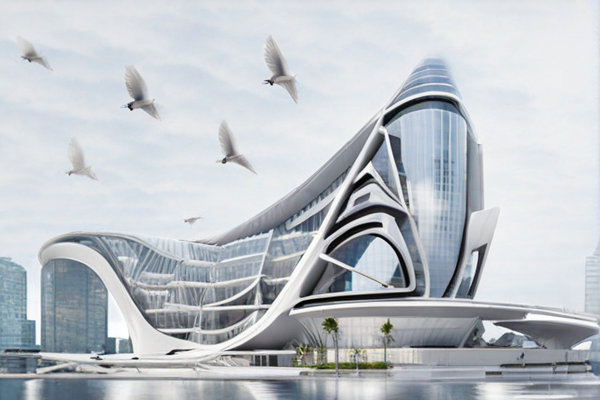

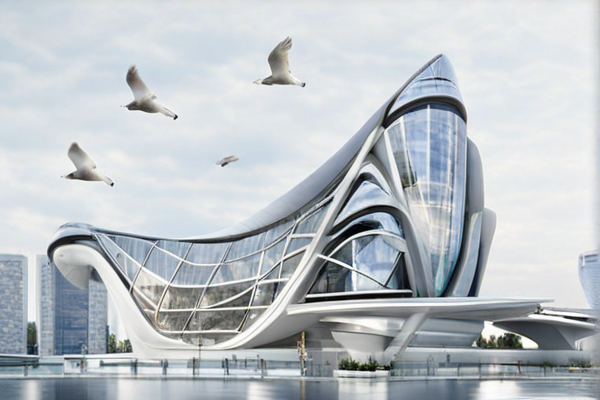

In [26]:
prompt = "navy blue sky, birds soaring, white cloud, super high quality, realistic architectural photos, well-designed exterior appearance, super realistic, realistic lighting, high-quality masterpiece"

image = refiner(
    prompt=prompt, 
    image=raw_img,
    num_images_per_prompt=4,
    num_inference_steps=50,
).images

for i in range(4): 
    image[i].show()